In [44]:
import pandas as pd    
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy as sp
import socket
import sklearn


In [68]:
# Loading CVS files as Dataframes

anime_data = pd.read_csv(r"C:\Users\Isha Sharma\Downloads\anime.csv")
rating_data = pd.read_csv(r"C:\Users\Isha Sharma\Downloads\rating.csv (1).zip")





,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [69]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [72]:
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [46]:
## print shape of dataset with rows and columns and information - anime_data
print ("The shape of the  data is (row, column):"+ str(anime_data.shape))
print (anime_data.info())
## print shape of dataset with rows and columns and information- user rating
print ("The shape of the  data is (row, column):"+ str(rating_data.shape))
print (rating_data.info())

The shape of the  data is (row, column):(12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
The shape of the  data is (row, column):(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [47]:
#We are merging our csv's based on anime_id from both datasets and later we are renaming the columns
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes= ['', '_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title', 'rating_user': 'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Top 10 Anime based on rating counts


Text(0, 0.5, 'User Rating count')

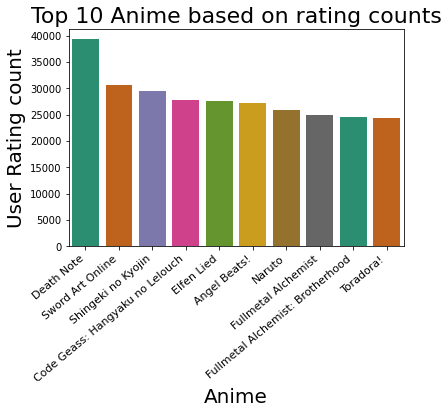

In [48]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )

# Plotting the bar plot for top 10 anime as per rating 
top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
#ax = sns.distplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2",bins=50, kde=False)


ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

# Top 10 Anime based on Community size


Text(0, 0.5, 'Community Size')

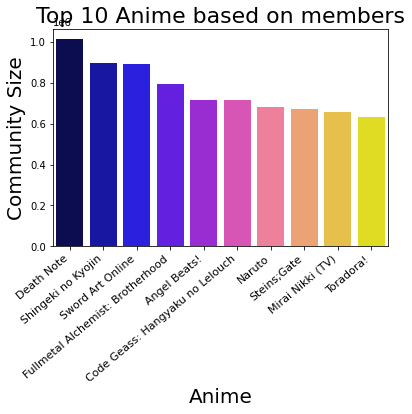

In [49]:
#Creating a copy and dropping the duplicates
duplicate_anime=anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset ="anime_title", 
                     keep = 'first', inplace = True)
#Plotting bar plot               
top10_animemembers=duplicate_anime[['anime_title', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="members", data=top10_animemembers, palette="gnuplot2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('Community Size', fontsize = 20)

# Medium of streaming

In [51]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

# Preparing data for consumption- Sonaeru (備える)


# Handling NaN values


In [74]:

#Replacing -1 with NaN in user_rating column
anime_feature=anime_fulldata.copy()
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)
anime_feature.head()

#dropping all the null values as it aids nothing
anime_feature = anime_feature.dropna(axis = 0, how ='any') 
anime_feature.isnull().sum()


anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

# filtering user_id

In [54]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]


# Pivot dojo

In [55]:
anime_pivot=anime_feature.pivot_table(index='anime_title',columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()


user_id,5,7,17,38,43,46,123,129,139,160,...,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recommendation building phase — Tsukuru (作る)


# Collaborative Filtering


In [65]:

#Cosine Similarity using KNN

from scipy.sparse import csr_matrix
#Creating a sparse matrix
anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

#Fitting the model
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [57]:
query_index = np.random.choice(anime_pivot.shape[0])
#print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


# Testing collaborative recommendation


In [58]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Hikari: Kariya wo Tsunagu Monogatari:

1: Tiger &amp; Bunny: Too Many Cooks Spoil the Broth, with distance of 0.0:
2: Sinbad: Soratobu Hime to Himitsu no Shima, with distance of 0.5084608476885757:
3: Shinpi no Hou, with distance of 0.5691797815723354:
4: Promised Town, with distance of 0.5970885179873099:
5: Tsubasa to Hotaru (2016), with distance of 0.6008859368573565:


# Cleaning anime_title

In [59]:

import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

# Term Frequency (TF) and Inverse Document Frequency (IDF)


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

#getting tfidf
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)


In [61]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

#getting the indices of anime title
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()


# Content based Recommendation function


In [62]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return pd.DataFrame({'Anime name': anime_data['name'].iloc[anime_indices].values,
                                 'Rating': anime_data['rating'].iloc[anime_indices].values})


In [70]:
give_rec('Fullmetal Alchemist: Brotherhood')

,Anime name,Rating
0,Fullmetal Alchemist: Brotherhood Specials,8.11
1,Fullmetal Alchemist,8.33
2,Fullmetal Alchemist: The Sacred Star of Milos,7.50
3,Jikuu Tenshou Nazca,5.88
4,Lodoss-tou Senki: Eiyuu Kishi Den,7.25
5,Hai to Gensou no Grimgar,7.87
6,Vampire Hunter,6.83
7,Wan Wan Chuushingura,6.12
8,Tales of Vesperia: The First Strike,7.79
9,Arion,6.37


In [71]:
give_rec('Steins;Gate')

,Anime name,Rating
0,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61
1,Steins;Gate: Oukoubakko no Poriomania,8.46
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34
3,Steins;Gate 0,NaN
4,Under the Dog,6.55
5,Loups=Garous,6.43
6,Loups=Garous Pilot,5.87
7,Ibara no Ou,7.24
8,Arve Rezzle: Kikaijikake no Yousei-tachi,6.44
9,Higashi no Eden,8.03
